Tareas realizadas por DAVID MARRERO SOSA y HUGO HERNÁNDEZ MORALES

Paquetes necesarios.

In [22]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA 1: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez.

(800, 800, 3)


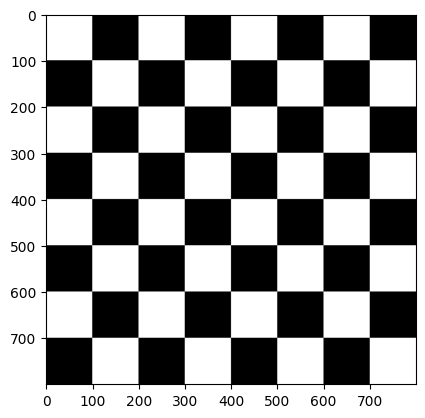

In [23]:
#Crea una imagen con tres planos
color_img = np.zeros((800,800,3), dtype = np.uint8)
# Recorremos, de 100 en 100, eje X e Y de la imagen (800x800)
for i in range(0, 800, 100):
    for j in range(0, 800, 100):
        # Si ambos pixel X y pixel Y pares o ambos impares, hacer 100 píxeles en eje X e Y blancos (cuadrado blanco). 
        if (i % 200 == 0 and j % 200 == 0) or (i % 200 != 0 and j % 200 != 0):
            color_img[i:i+100, j:j+100, 0:3] = 255

#Dimensiones
print(color_img.shape)
#Visualiza con matplotlib (sin especificar el mapa de color gris)
plt.imshow(color_img, cmap='gray') 
plt.show()

TAREA 2: Crear una imagen estilo Mondrian.

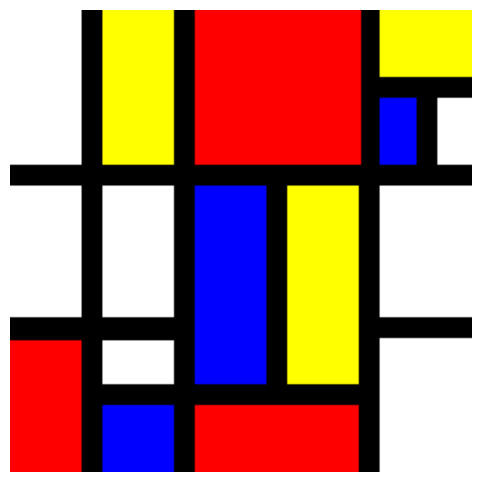

In [24]:
# TAREA 2

# Dimensiones de la imagen a crear
ancho = 300
alto = 200

# Creamos una imagen con tres planos
color_img = np.zeros((200,200,3), dtype = np.uint8)


# Creamos diferentes rectangulos con diferentes medidas y colores para crear la imagen requerida
cv2.rectangle(color_img,(0,0),(int(ancho/10),int(alto/3)),(255,255,255),-1)
cv2.rectangle(color_img,(0,int(10+alto/3)),(int(ancho/10),2*int(alto/3)),(255,255,255),-1)
cv2.rectangle(color_img,(0,int(10+2*alto/3)),(int(ancho/10),int(alto)),(255,0,0),-1)
cv2.rectangle(color_img,(10+2*int(ancho/10),0),(10+int(ancho/10),int(alto/3)),(255,255,0),-1)
cv2.rectangle(color_img,(10+2*int(ancho/10),int(10+alto/3)),(10+int(ancho/10),2*int(alto/3)),(255,255,255),-1)
cv2.rectangle(color_img,(10+2*int(ancho/10),int(10+2*alto/3)),(10+int(ancho/10),(int(alto-alto/6)-5)),(255,255,255),-1)
cv2.rectangle(color_img,(10+2*int(ancho/10),(int(alto-alto/6)+5)),(10+int(ancho/10),(int(alto))),(0,0,255),-1)
cv2.rectangle(color_img,(20+2*int(ancho/10),0),(25+3*int(ancho/7),int(alto/3)),(255,0,0),-1)
cv2.rectangle(color_img,(20+2*int(ancho/10),int(10+alto/3)),(20+3*int(ancho/10),(int(alto-alto/6)-5)),(0,0,255),-1)
cv2.rectangle(color_img,(30+3*int(ancho/10),int(10+alto/3)),(30+4*int(ancho/10),(int(alto-alto/6)-5)),(255,255,0),-1)
cv2.rectangle(color_img,(20+2*int(ancho/10),(int(alto-alto/6)-5)+10),(30+4*int(ancho/10),int(alto)),(255,0,0),-1)
cv2.rectangle(color_img,(10+5*int(ancho/10),0),(int(ancho),int(alto/6)-5),(255,255,0),-1)
cv2.rectangle(color_img,(10+5*int(ancho/10),int(alto/6)+5),(int(6*ancho/10-5),int(alto/3)),(0,0,255),-1)
cv2.rectangle(color_img,(int(6*ancho/10+5),int(alto/6)+5),(int(ancho),int(alto/3)),(255,255,255),-1)
cv2.rectangle(color_img,(10+5*int(ancho/10),(int(10+alto/3))),(int(ancho),2*int(alto/3)),(255,255,255),-1)
cv2.rectangle(color_img,(10+5*int(ancho/10),(10+2*int(alto/3))),(int(ancho),int(alto)),(255,255,255),-1)

plt.figure(figsize=[6,6])

# Quitamos los ejes para que el output sea la propia imagen
plt.axis('off')

plt.imshow(color_img) 

plt.show()

TAREA 3: Resuelve una de las tareas previas (en nuestro caso, el tablero de ajedrez) con las funciones de dibujo de OpenCV.

(800, 800, 3)


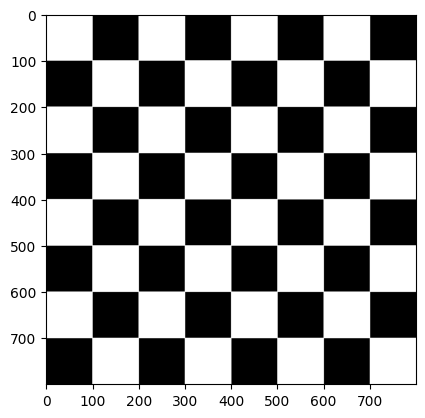

In [25]:
#TAREA 3

#Crea una imagen con tres planos
color_img = np.zeros((800,800,3), dtype = np.uint8)
for i in range(0, 800, 100):
    for j in range(0, 800, 100):
        # Si ambos pixel X y pixel Y pares o ambos impares, dibujar rectángulo blanco 
        if (i % 200 == 0 and j % 200 == 0) or (i % 200 != 0 and j % 200 != 0):
            cv2.rectangle(color_img, (i, j), (i+100, j+100), (255, 255, 255), -1)

#Dimensiones
print(color_img.shape)
#Visualiza con matplotlib (sin especificar el mapa de color gris)
plt.imshow(color_img, cmap='gray') 
plt.show()

TAREA 4: Modifica de forma libre los valores de una plano de la imagen.

In [26]:
#TAREA 4

vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape

        #TAREA: MODIFICAR LOS VALORES DE LOS PLANOS DE LA IMAGEN
        #Invertimos el canal R
        r = 255 - r

        # Aumentamos el brillo del canal G
        g = np.clip(g + 50, 0, 255)

        # Disminuimos el brillo del canal B
        b = np.clip(b - 50, 0, 255)

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA 5: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen.

In [27]:
vid = cv2.VideoCapture(0)

lanzado = 0 #bandera para primer fotograma
px = -1
while(True):
    #fotograma a fotograma
    ret, frame = vid.read()
    if ret: 
        # Sumar los valores de los canales B, G, R para cada píxel
        suma_canales = frame.sum(axis=2)

        # Encontrar el valor mínimo y máximo, así como sus posiciones
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(suma_canales)

        # Destacar el píxel más oscuro (valor mínimo) con un círculo ROJO (para que destaque el circulo en fondo blanco)
        cv2.circle(frame, min_loc, 5, (0, 0, 255), 2)

        # Destacar el píxel más claro (valor máximo) con un círculo AMARILLO (para que destaque el circulo en fondo negro)
        cv2.circle(frame, max_loc, 5, (0, 255, 255), 2)


        cv2.imshow('Píxeles Destacados', frame)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

#Libera el objeto de captura
vid.release()

#Destruye ventanas
cv2.destroyAllWindows()

TAREA 6: Llevar a cabo una propuesta propia de pop art.

In [28]:
#TAREA 6.

vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Aplicamos diferentes variaciones para el pop art

        # Filtro de color rosa (255, 8, 121)
        tl[:,:,2] = np.where(r > 128, 255, r)
        tl[:,:,1] = np.where(g < 128, 8, g)
        tl[:,:,0] = np.where(b < 128, 121, b)

        # Filtro de color amarillo (255, 255, 0) e inverso en el canal azul
        tr[:,:,0] = 255 - b
        tr[:,:,1] = np.where(g > 128, 255, g)
        tr[:,:,2] = np.where(r > 64, 255, r)

        # Filtro de color azul (0, 0, 255) y variaciones    
        bl[:,:,0] = np.where(b > 128, 255, b)
        bl[:,:,1] = np.where(g < 64, 0, g)
        bl[:,:,2] = 0

        # Filtro de color lima (83, 255, 8) y variaciones
        br[:,:,0] = np.where(b < 128, 8, b)
        br[:,:,1] = np.where(g > 128, 255, g)
        br[:,:,2] = np.where(r < 128, 83, 255-r)
    
        # Muestra composición
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()